In [1]:
import pandas as pd

FILE = "/Users/Shared/data/HN_posts_year_to_Sep_26_2016.csv"

data = pd.read_csv(FILE)

In [2]:
data = data[['id','title']]

In [3]:
title = data['title'].values.tolist()

TITLE_COUNT = 3000

In [4]:
import re

def preprocess( raw_titles ):
    #
    # 1. Remove non-letters        
    letters_only = re.sub("[^a-zA-Z]", " ", raw_titles) 
    #
    # 2. Convert to lower case, split into individual words
    words = letters_only.lower().split()                             
    #
    # 3. Join the words back into one string separated by space, 
    # and return the result.
    return( " ".join( words ))

clean_title = [preprocess(t) for t in title[:TITLE_COUNT]]

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = "english",   \
                             max_features = 5000) 

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
train_data_features = vectorizer.fit_transform(clean_title)

# Numpy arrays are easy to work with, so convert the result to an 
# array
train_data_features = train_data_features.toarray()

In [6]:
# Take a look at the words in the vocabulary
vocab = vectorizer.get_feature_names()
print(vocab)

['abc', 'abrams', 'abridged', 'abruptly', 'absolutely', 'abstraction', 'abstracts', 'abu', 'abuse', 'abusive', 'academia', 'academics', 'academy', 'accelerate', 'accelerated', 'acceleration', 'accelerator', 'accelerators', 'accenture', 'acceptable', 'access', 'accessbility', 'accessible', 'accident', 'accidentally', 'accidents', 'accord', 'according', 'accordions', 'account', 'accountability', 'accounts', 'accreditor', 'accused', 'achieve', 'achievements', 'acl', 'acoustic', 'acquire', 'acquires', 'acquisition', 'acsl', 'act', 'acting', 'action', 'actions', 'active', 'activist', 'activity', 'actor', 'actors', 'actually', 'ad', 'ada', 'adapted', 'add', 'added', 'addicting', 'addiction', 'addictive', 'address', 'addresses', 'adds', 'adhd', 'admin', 'administrator', 'adobe', 'adoption', 'adopts', 'adresses', 'ads', 'adult', 'adulthood', 'advance', 'advanced', 'advancement', 'advances', 'adventure', 'adventures', 'adversarial', 'advertisements', 'advertising', 'advice', 'advisory', 'adword

In [7]:
import numpy as np
U, s, V = np.linalg.svd(train_data_features, full_matrices=True)

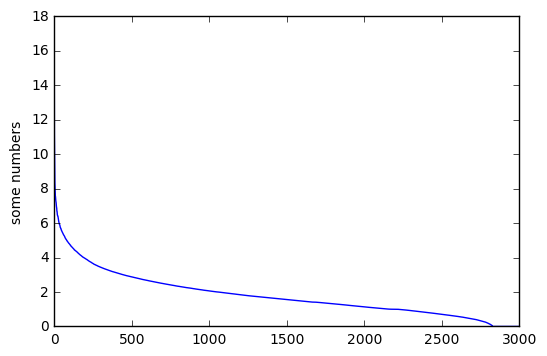

In [8]:
import matplotlib.pyplot as plt
plt.plot(s)
plt.ylabel('some numbers')
plt.show()